In [1]:
import numpy as np

In [2]:
f = np.load('../data/imdb/textvqa_0.5/imdb_textvqa_val.npy', allow_pickle=True)

In [3]:
f[1]

{'question': 'what is the brand of this camera?',
 'image_id': '003a8ae2ef43b901',
 'image_classes': ['Cassette deck',
  'Printer',
  'Medical equipment',
  'Computer mouse',
  'Scale',
  'Telephone',
  'Camera',
  'Ipod',
  'Remote control'],
 'flickr_original_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'flickr_300k_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'image_width': 1024,
 'image_height': 664,
 'answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  'dakota digital',
  'dakota',
  'dakota'],
 'ocr_tokens': ['DAKOTA', 'DIGITAL', 'Single-Use', 'Camera', 'digrtal'],
 'ocr_info': [{'word': 'DAKOTA',
   'bounding_box': {'top_left_x': 0.14370192587376,
    'top_left_y': 0.1531290858984,
    'width': 0.12223755568266,
    'height': 0.071707926690578,
    'rotation': 0,
    'yaw': 0.92349565029144,
    'roll': 0,
    'pitch': 0}},
  {'word': 'DIGITAL',
   'bounding_bo

In [4]:
import json
fv = json.load(open('/home/data/textvqa/TextVQA_0.5_val.json','rb'))

In [5]:
import json
import os
import pickle
from PIL import Image, ImageDraw ,ImageFont
import matplotlib.pyplot as plt
import numpy as np
import h5py
split = {'train':'train','val':'val','test':'test'}

In [6]:
class Question(object):
    
    def __init__(self, dataset):
        super(Question,self).__init__()
        self.split = split[dataset]
        self.questions = json.load(open('/home/data/textvqa/TextVQA_0.5_'+self.split+'.json','r'))['data']
        
    def get_question(self, index = 0, show = False):
        ocr_tokens = self.questions[index]['ocr_tokens']
        question = self.questions[index]['question']
        question_tokens = self.questions[index]['question_tokens']
        ocr_info = self.questions[index]['ocr_info']
        image_id = self.questions[index]['image_id']
        
        image_size = (self.questions[index]['image_width'], self.questions[index]['image_height'])
        image_classes = self.questions[index]['image_classes']
        question_id = self.questions[index]['question_id']
        if self.split not in ['val','train']:
            if show:
                print(question)
                draw_image(self.split,image_id)
            return image_id, image_size, question, question_id, ocr_tokens, ocr_info
        else :
            answers = self.questions[index]['answers']
            if show:
                print("question", question)
                print("answers", answers)
                draw_image(self.split,image_id)
            return image_id, image_size, question, question_id, answers, ocr_tokens, ocr_info

    def get_question_by_question_id(self, question_id, show=False):
        
        for i in range(len(self.questions)):
            if self.questions[i]['question_id']==question_id:
                return self.get_question(i, show)
        print("Can't find this question")
        return None
        
    def length(self):
        return len(self.questions)
    
train_set = Question('train')

In [7]:
class improved_ocr:
    def __init__(self):
        self.ocr_train = np.load(open("/home/zs/OCR/aster-signal-image/datatest/train.npy", "rb"),allow_pickle=True)
    def get_ocr_by_imageId(self, image_id):
        for i in range(len(self.ocr_train)):
            if (self.ocr_train[i]["image_id"] == image_id):
                return self.ocr_train[i]
iocr = improved_ocr()

In [8]:
def draw_image(dataset, image_id):
    image_dir = '/home/data/textvqa/'+('train' if dataset == 'train' or dataset == 'val' else 'test')+'_images/'
    image=Image.open(image_dir+image_id+'.jpg')
    draw = ImageDraw.Draw(image)
#     for i in range(bb.shape[0]):
#         at1 = x_in_top(i,ind[:,0]) 
#         at2 = x_in_top(i,ind[:,1])
#         if at1 or at2:
#             color = get_color()
#         else:
#             continue
#         draw.rectangle((bb[i][0]*image.width,bb[i][1]*image.height,bb[i][2]*image.width,bb[i][3]*image.height), outline=color,width=3)
#     image.save(save_dir+str(index)+'_'+image_name)
    plt.figure(figsize=(10,10))
    plt.imshow(image)

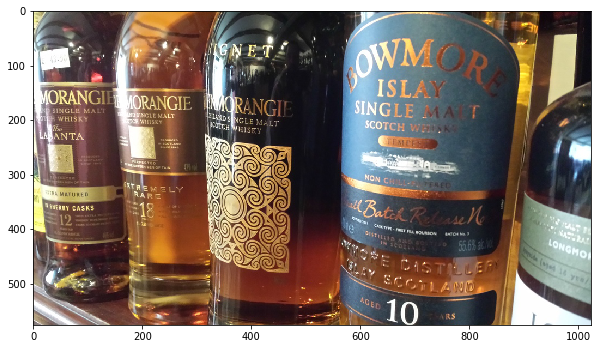

In [9]:
draw_image('val','831bcec304a17054')

question what type of hotel stay is being advertised?
answers ['extended', 'extended', 'extended', 'extended', 'extended stay', 'extended stay america', 'an extended stay', 'extended', 'extended stay is being advertised', 'extended']
['extended', 'AMERICA', 'STAY']


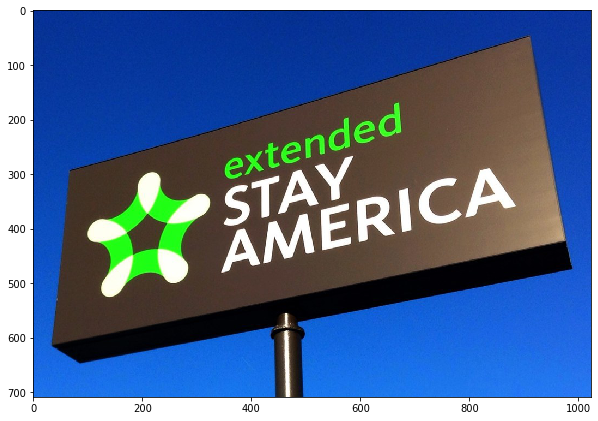

In [24]:
# 1778
# 1748
image_id, image_size, question, question_id, answers, ocr_tokens, ocr_info = train_set.get_question(1728)
# question_id = 16527
image_id, image_size, question, question_id, answers, ocr_tokens, ocr_info = train_set.get_question_by_question_id(question_id, True)
print(ocr_tokens)
# print(iocr.get_ocr_by_imageId(image_id)['ocr_tokens'])